<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/Chapter5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

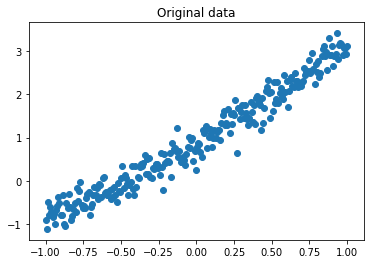

In [73]:
import tensorflow as tf
import numpy as np
from sklearn.utils import shuffle
%matplotlib inline
import matplotlib.pyplot as plt

trainsamples = 200
testsamples = 60

#Here we will represent the model, a simple imput, a hidden layer of sigmoid activation
def model(X, hidden_weights1, hidden_bias1, ow):
   hidden_layer =  tf.nn.sigmoid(tf.matmul(X, hidden_weights1)+ b)
   return tf.matmul(hidden_layer, ow)

dsX = np.linspace(-1, 1, trainsamples + testsamples).transpose()
dsY = 0.4* pow(dsX,2) +2 * dsX + np.random.randn(*dsX.shape) * 0.22 + 0.8
plt.figure() # Create a new figure
plt.title('Original data')
plt.scatter(dsX,dsY) #Plot a scatter draw of the datapoints

In [74]:
 X = tf.placeholder("float")
 Y = tf.placeholder("float")

# Create first hidden layer
hw1 = tf.Variable(tf.random_normal([1, 10], stddev=0.1))
# Create output connection
ow = tf.Variable(tf.random_normal([10, 1], stddev=0.0))
# Create bias
b = tf.Variable(tf.random_normal([10], stddev=0.1))
model_y = model(X, hw1, b, ow)
# Cost function
cost = tf.pow(model_y-Y, 2)/(2)
# construct an optimizer
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost)

# Launch the graph in a session
with tf.Session() as sess:
   tf.initialize_all_variables().run() #Initialize all variables
   for i in range(1,100):
       dsX, dsY = shuffle (dsX.transpose(), dsY) #We randomize the samples to mplement a better training
       trainX, trainY =dsX[0:trainsamples], dsY[0:trainsamples]
       for x1,y1 in zip (trainX, trainY):
           sess.run(train_op, feed_dict={X: [[x1]], Y: y1})
       testX, testY = dsX[trainsamples:trainsamples + testsamples], dsY[0:trainsamples:trainsamples+testsamples]
       cost1=0.
       for x1,y1 in zip (testX, testY):
           cost1 += sess.run(cost, feed_dict={X: [[x1]], Y: y1}) / testsamples
       if (i%10 == 0):
           print("Average cost for epoch " + str (i) + ":" + str(cost1))

Average cost for epoch 10:[[0.04102231]]
Average cost for epoch 20:[[0.01180018]]
Average cost for epoch 30:[[0.09638548]]
Average cost for epoch 40:[[0.01444089]]
Average cost for epoch 50:[[0.03796269]]
Average cost for epoch 60:[[0.00723084]]
Average cost for epoch 70:[[0.02375063]]
Average cost for epoch 80:[[0.06177978]]
Average cost for epoch 90:[[3.9795373e-06]]


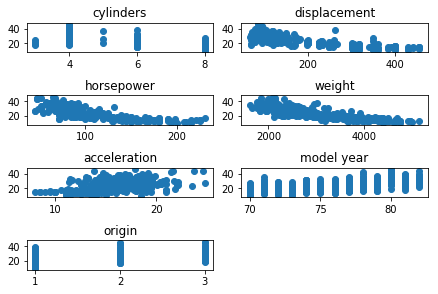

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, model_selection, metrics
from sklearn import preprocessing
import tensorflow.contrib.learn as skflow
import tensorflow as tf

# Read the original dataset
df = pd.read_csv("mpg.csv", header=0)

# Convert the displacement column as float
df['displacement']=df['displacement'].astype('float32')

# We get data columns from the dataset
# First and last (mpg and car names) are ignored for X
X = df[df.columns[1:8]]
y = df['mpg']
plt.figure() # Create a new figure
for i in range (1, 8):
   number = 420 + i
   ax1 = plt.subplot(number)
   ax1.locator_params(nbins=3)
   plt.title(list(df)[i])
   ax1.scatter(df[df.columns[i]],y) #Plot a scatter draw of the datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



In [78]:
# Split the datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

# Scale the data for convergency optimization
scaler = preprocessing.StandardScaler()

# Set the transform parameters
X_train = scaler.fit_transform(X_train)

# Build a 2 layer fully connected DNN with 10 and 5 units respectively
feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
#feature_columns = tf.cast(feature_columns, tf.float32)
regressor = skflow.DNNRegressor(feature_columns=feature_columns, hidden_units=[10, 5], optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.051))

# Fit the regressor
regressor.fit(X_train, y_train, steps=500, batch_size=1)

# Get some metrics based on the X and Y test data
predicted_y= regressor.predict(scaler.fit_transform(X_test), as_iterable=False)
score = metrics.mean_squared_error(predicted_y, y_test)
print(" Total Mean Squared Error: " + str(score))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f901d37e278>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/tmp/tmpyvfm0str'}


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyvfm0str/model.ckpt.
INFO:tensorflow:loss = 806.56, step = 1
INFO:tensorflow:global_step/sec: 946.892
INFO:tensorflow:loss = 31.697126, step = 101 (0.111 sec)
INFO:tensorflow:global_step/sec: 1139.42
INFO:tensorflow:loss = 0.08528506, step = 201 (0.084 sec)
INFO:tensorflow:global_step/sec: 1186.86
INFO:tensorflow:loss = 22.795921, step = 301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1170.15
INFO:tensorflow:loss = 19.084057, step = 401 (0.085 sec)
INFO:tensorflow:Saving checkpoints for 500 into /tmp/tmpyvfm0str/model.ckpt.
INFO:tensorflow:Loss for final step: 2.3884518.


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpyvfm0str/model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
 Total Mean Squared Error: 65.7509173854019


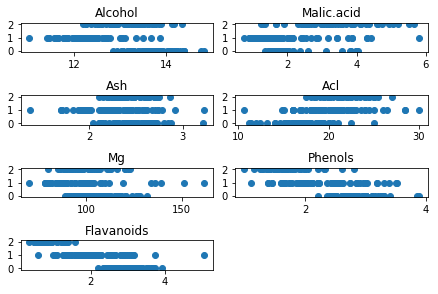

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, model_selection, metrics
from sklearn import preprocessing
import tensorflow.contrib.learn as skflow
import tensorflow as tf

# Read the original dataset
df = pd.read_csv("wine.csv", header=0)

# We get data columns from the dataset
# First and last (mpg and car names) are ignored for X
X = df[df.columns[1:8]]
y = df['Wine'].values-1
plt.figure() # Create a new figure
for i in range (1, 8):
   number = 420 + i
   ax1 = plt.subplot(number)
   ax1.locator_params(nbins=3)
   plt.title(list(df)[i])
   ax1.scatter(df[df.columns[i]],y) #Plot a scatter draw of the datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)



In [80]:
sess = tf.InteractiveSession()
import pandas as pd
from sklearn.utils import shuffle
from sklearn import preprocessing
import tensorflow as tf

flags = tf.app.flags
FLAGS = flags.FLAGS

df = pd.read_csv("./wine.csv", header=0)
print (df.describe())

#df['displacement']=df['displacement'].astype(float)
X = df[df.columns[1:13]].values
y = df['Wine'].values-1
Y = tf.one_hot(indices = y, depth=3, on_value = 1., off_value = 0., axis = 1, name = "a").eval()
X, Y = shuffle(X, Y)

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Create the model
x = tf.placeholder(tf.float32, [None, 12])
W = tf.Variable(tf.zeros([12, 3]))
b = tf.Variable(tf.zeros([3]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 3])
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Train
tf.global_variables_initializer().run()
for i in range(100):
    X,Y =shuffle (X, Y, random_state=1)
    Xtr=X[0:140,:]
    Ytr=Y[0:140,:]
    Xt=X[140:178,:]
    Yt=Y[140:178,:]
    Xtr, Ytr = shuffle (Xtr, Ytr, random_state=0)

    #batch_xs, batch_ys = mnist.train.next_batch(100)
    batch_xs, batch_ys = Xtr , Ytr
    train_step.run({x: batch_xs, y_: batch_ys})
    cost = sess.run (cross_entropy, feed_dict={x: batch_xs, y_: batch_ys})

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(accuracy.eval({x: Xt, y_: Yt}))

sess.close()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


             Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoid.phenols     Proanth   Color.int  \
count  178.000000  178.000000            178.000000  178.000000  178.000000   
mean     2.295112    2.029270              0.361854    1.590899    5.058090   
std      0.625851    0.998859    